<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
starwars_episodes = {
  "I":'''Turmoil has engulfed the Galactic Republic. The taxation of trade routes to outlying star systems is in dispute. Hoping to resolve the matter with a blockade of deadly battleships, the greedy Trade Federation has stopped all shipping to the small planet of Naboo. While the Congress of the Republic endlessly debates this alarming chain of events, the Supreme Chancellor has secretly dispatched two Jedi Knights, the guardians of peace and justice in the galaxy, to settle the conflict....''',
  "II":'''There is unrest in the Galactic Senate. Several thousand solar systems have declared their intentions to leave the Republic. This separatist movement, under the leadership of the mysterious Count Dooku, has made it difficult for the limited number of Jedi Knights to maintain peace and order in the galaxy. Senator Amidala, the former Queen of Naboo, is returning to the Galactic Senate to vote on the critical issue of creating an ARMY OF THE REPUBLIC to assist the overwhelmed Jedi....''',
  "III":'''War! The Republic is crumbling under attacks by the ruthless Sith Lord, Count Dooku. There are heroes on both sides. Evil is everywhere. In a stunning move, the fiendish droid leader, General Grievous, has swept into the Republic capital and kidnapped Chancellor Palpatine, leader of the Galactic Senate. As the Separatist Droid Army attempts to flee the besieged capital with their valuable hostage, two Jedi Knights lead a desperate mission to rescue the captive Chancellor....''',    
  "IV":'''It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire. During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet. Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy.....''',
  "V":'''It is a dark time for the Rebellion. Although the Death Star has been destroyed, Imperial troops have driven the Rebel forces from their hidden base and pursued them across the galaxy. Evading the dreaded Imperial Starfleet, a group of freedom fighters led by Luke Skywalker has established a new secret base on the remote ice world of Hoth. The evil lord Darth Vader, obsessed with finding young Skywalker, has dispatched thousands of remote probes into the far reaches of space....''',
  "VI":'''Luke Skywalker has returned to his home planet of Tatooine in an attempt to rescue his friend Han Solo from the clutches of the vile gangster Jabba the Hutt. Little does Luke know that the GALACTIC EMPIRE has secretly begun construction on a new armored space station even more powerful than the first dreaded Death Star. When completed, this ultimate weapon will spell certain doom for the small band of rebels struggling to restore freedom to the galaxy...''',
  "VII":'''Luke Skywalker has vanished. In his absence, the sinister FIRST ORDER has risen from the ashes of the Empire and will not rest until Skywalker, the last Jedi, has been destroyed. With the support of the REPUBLIC, General Leia Organa leads a brave RESISTANCE. She is desperate to find her brother Luke and gain his help in restoring peace and justice to the galaxy. Leia has sent her most daring pilot on a secret mission to Jakku, where an old ally has discovered a clue to Luke's whereabouts....''',
  "VIII":'''The FIRST ORDER reigns. Having decimated the peaceful Republic, Supreme Leader Snoke now deploys the merciless legions to seize military control of the galaxy. Only General Leia Organa's band of RESISTANCE fighters stand against the rising tyranny, certain that Jedi Master Luke Skywalker will return and restore a spark of hope to the fight. But the Resistance has been exposed. As the First Order speeds toward the rebel base, the brave heroes mount a desperate escape....'''
}

# LDA


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

def display_topic(words_probabilities):
  bows = []
  [bows.extend([word] * (int(probability*100) + 1)) for word,probability in words_probabilities]
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(bows))
  plt.figure(figsize=[3,3])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

In [0]:
n_topics = 7

In [0]:
import gensim
docs = [[token.lower() for token in gensim.utils.tokenize(gensim.parsing.preprocessing.remove_stopwords(doc))] for doc in starwars_episodes.values()]
vocab = gensim.corpora.Dictionary(docs)
bow_corpus = [vocab.doc2bow(doc) for doc in docs]
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = n_topics, id2word = vocab, passes = 10, workers = 2)

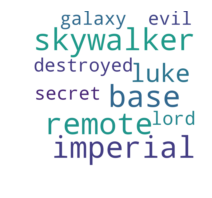

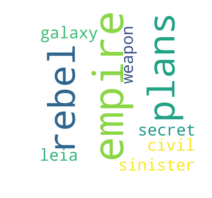

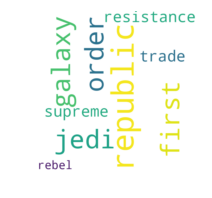

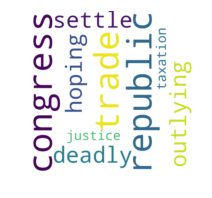

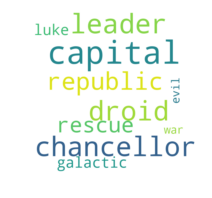

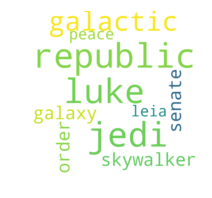

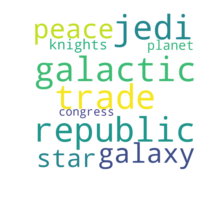

In [248]:
for topic_no in range(n_topics):
  display_topic(lda_model.show_topic(topic_no))

# Clustering

In [0]:
from scipy.spatial.distance import cosine
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np

def k_cluster(vectors, k):
  clusterer = KMeans(n_clusters = k)
  clusterer.fit(vectors)
  return clusterer.labels_

def d_cluster(vectors):
  clusterer = DBSCAN(eps=20, min_samples=3)
  clusterer.fit(vectors)
  return clusterer.labels_

def plot_clusters(words, svectors, clusters):
  pca = PCA(n_components=3)
  principalComponents = pca.fit_transform(svectors)
  
  dataframe = pd.DataFrame(data = principalComponents, columns = ['x', 'y','z'])

  sns.set_style("whitegrid")
  palette = sns.color_palette("husl", max(set(clusters))+1)
  dataframe['colour'] = pd.Series([palette[i] for i in clusters])
  
  fig = plt.figure()
  graph = fig.gca(projection='3d')
  [graph.text(x, z, y, s, 'x', color = c) for x, y, z, s, c in zip(dataframe['x'], dataframe['y'], dataframe['z'], words, dataframe['colour'])]
  graph.set_xlim(min(dataframe['x']), max(dataframe['x']))
  graph.set_ylim(min(dataframe['z']), max(dataframe['z']))
  graph.set_zlim(min(dataframe['y']), max(dataframe['y']))
  plt.show()
  
  graph2=sns.regplot(data=dataframe, x="x", y="y", fit_reg=False, marker="+")
  [graph2.text(x, y, s,color=c) for x,y,s,c in zip(dataframe['x'],dataframe['y'],words,dataframe["colour"])]

def cluster_centre(cluster_vectors):
  return np.mean( np.array(cluster_vectors), axis=0 )
  
def name_cluster(cluster_words, cluster_vectors):
  cc_vector = cluster_centre(cluster_vectors)
  vector_distances = [cosine(vector,cc_vector) for vector in cluster_vectors]
  return cluster_words[np.argmin(vector_distances)]

convert words to vectors (e.g. spacy - feel free to use others)

In [0]:
import spacy
sp = spacy.load('en')
sp_text = sp('\n'.join(starwars_episodes.values()).lower())
sp_words = [word.text for word in sp_text if word.is_alpha and not word.is_stop]
sp_vectors = [word.vector for word in sp_text if word.is_alpha and not word.is_stop]

## K-Means
cluster the word vectors using k-means clustering (number of clusters are determined by you)

In [0]:
clusterer_labels = k_cluster(sp_vectors, n_topics)

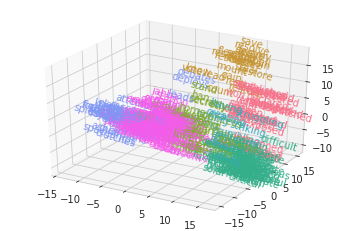

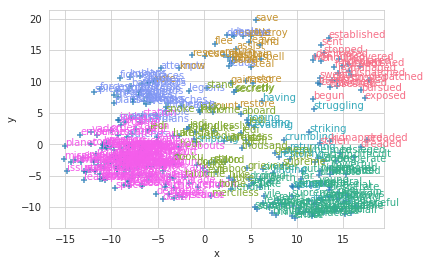

In [250]:
plot_clusters(sp_words, sp_vectors, clusterer_labels)

In [251]:
clusters = {i:[] for i in set(clusterer_labels)}
for idx,cluster_number in enumerate(clusterer_labels):
  clusters[cluster_number].append(idx)

[f"{cluster_no}:{name_cluster([sp_words[i] for i in cluster_ids], [sp_vectors[i] for i in cluster_ids])}" for cluster_no,cluster_ids in clusters.items() if cluster_no > -1]

['0:vanished',
 '1:resolve',
 '2:naboo',
 '3:galactic',
 '4:creating',
 '5:routes',
 '6:support']

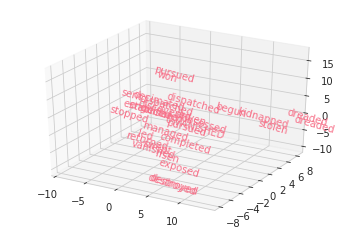

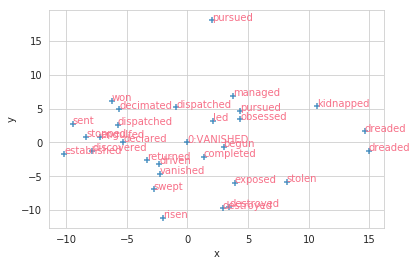

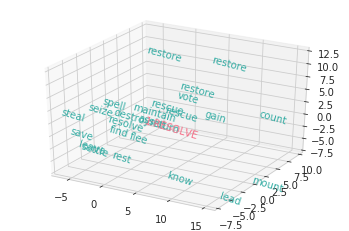

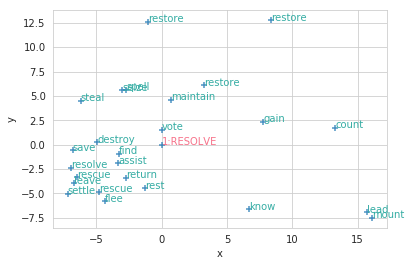

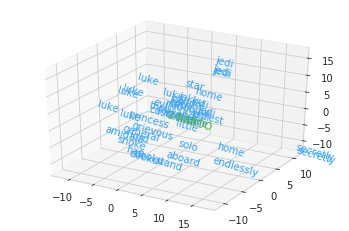

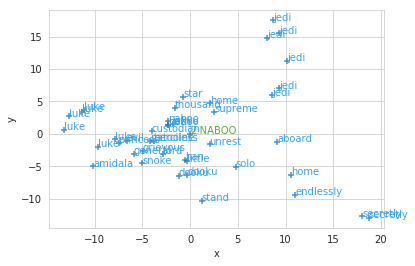

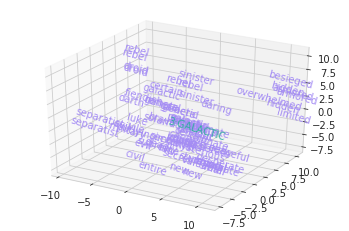

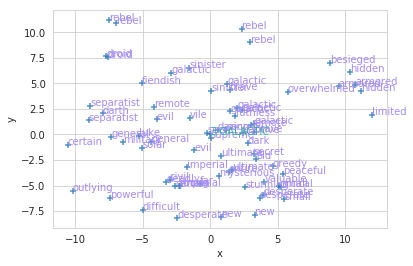

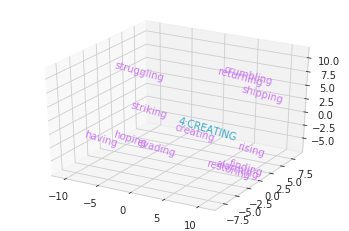

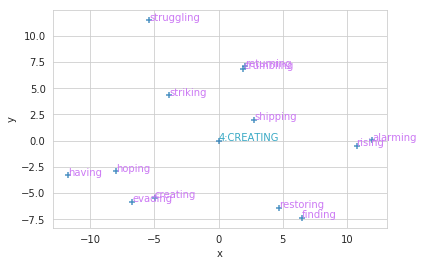

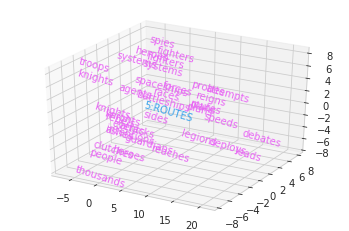

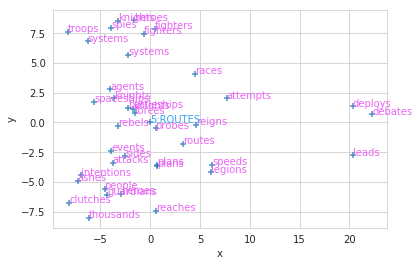

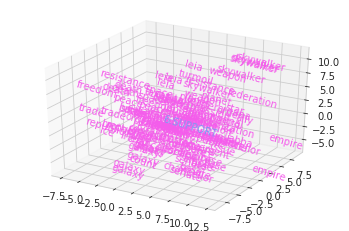

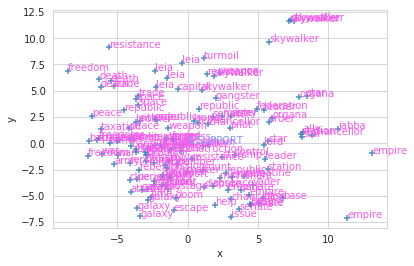

In [252]:
for cluster_number,cluster_ids in clusters.items():
  if cluster_number > -1:
    cluster_words = [sp_words[i] for i in cluster_ids] 
    cluster_vectors = [sp_vectors[i] for i in cluster_ids]
    
    cluster_name = name_cluster(cluster_words, cluster_vectors)
    cluster_words += [f'{cluster_number}:{cluster_name.upper()}']
    
    cc_vector = cluster_centre(cluster_vectors)
    cluster_vectors.append(cc_vector)
    
    cluster_colour = [cluster_number]*len(cluster_ids) +  [cluster_number - 1]
    
    plot_clusters(cluster_words, cluster_vectors, cluster_colour)

## DBScan
cluster the word vectors using a density based algorithm (number of clusters are automatically determined by the algorithm)

In [233]:
clusterer_labels = d_cluster(sp_vectors)
len(set(clusterer_labels))

7

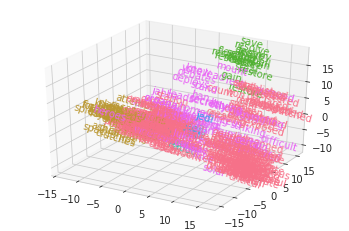

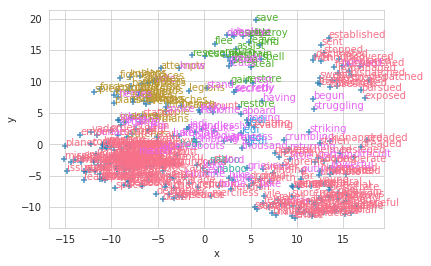

In [234]:
plot_clusters(sp_words, sp_vectors, clusterer_labels)

In [236]:
clusters = {i:[] for i in set(clusterer_labels)}
for idx,cluster_number in enumerate(clusterer_labels):
  clusters[cluster_number].append(idx)

[f"{cluster_no}:{name_cluster([sp_words[i] for i in cluster_ids], [sp_vectors[i] for i in cluster_ids])}" for cluster_no,cluster_ids in clusters.items() if cluster_no > -1]

['0:republic', '1:forces', '2:resolve', '3:naboo', '4:jedi', '5:luke']

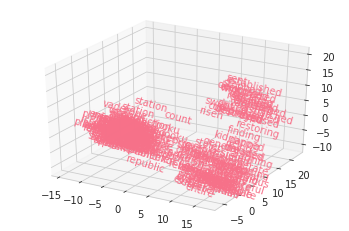

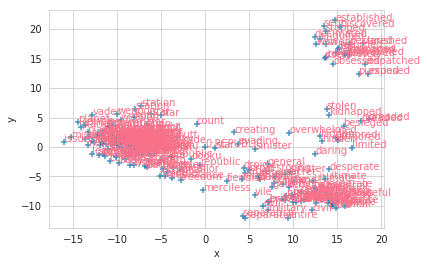

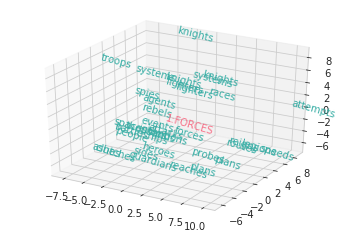

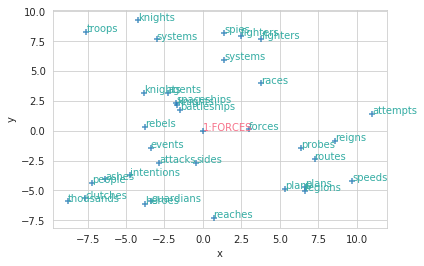

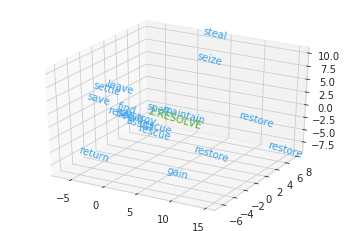

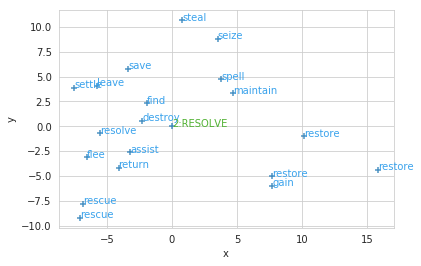

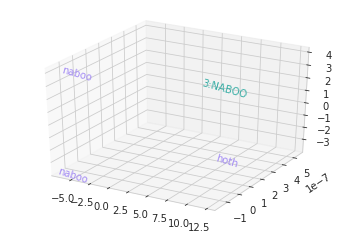

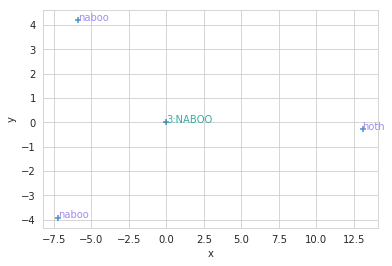

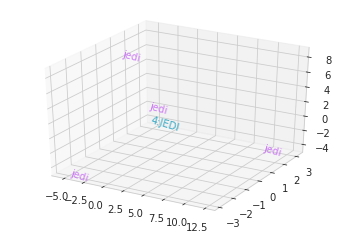

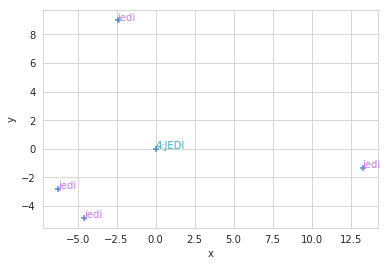

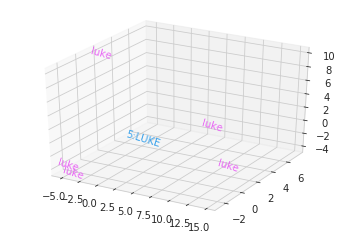

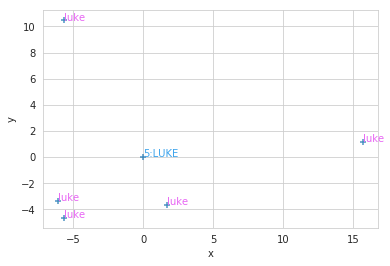

In [237]:
for cluster_number,cluster_ids in clusters.items():
  if cluster_number > -1:
    cluster_words = [sp_words[i] for i in cluster_ids] 
    cluster_vectors = [sp_vectors[i] for i in cluster_ids]
    
    cluster_name = name_cluster(cluster_words, cluster_vectors)
    cluster_words += [f'{cluster_number}:{cluster_name.upper()}']
    
    cc_vector = cluster_centre(cluster_vectors)
    cluster_vectors.append(cc_vector)
    
    cluster_colour = [cluster_number]*len(cluster_ids) +  [cluster_number - 1]
    
    plot_clusters(cluster_words, cluster_vectors, cluster_colour)